<h1 align="center">Volume 1: Facial Recognition.</h1>

    Jake Murphy (double-click to edit)
    Section 001
    11-16-21

In [1]:
import os
import numpy as np
from scipy import linalg as la
from imageio import imread
from matplotlib import pyplot as plt

### Helper Functions

In [2]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [3]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    
    #Displays the image
    new_image = np.reshape(image, (m, n))
    plt.imshow(new_image, cmap = "gray")
    plt.axis("off")
    plt.show()

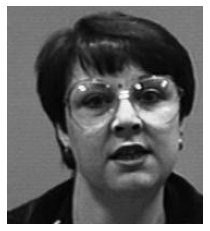

In [4]:
F = get_faces()
show(F[:,152])

In [15]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        #Reads in the database
        F = get_faces(path)
        prod, k = np.shape(F)
        mu = (1/k) * np.sum(F, axis = 1)
        mu = np.reshape(mu, (prod, 1))
        # print(mu)
        F_bar = F - mu
        
        #Initialize the attributes of the class
        self.mu = mu
        self.F_bar = F_bar
        #Computes the SVD
        U, sigma, Vh = la.svd(F_bar, full_matrices = False)
        self.U = U
        
        # show(U[:,100])

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        proj = self.U[:,0:s].T @ A
        return proj

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        #Reshapes the matrix so that broadcasting works
        shape = self.mu.shape
        g = np.reshape(g, shape)
        
        #Calculate g_hat
        g_bar = g - self.mu
        F_hat = self.project(self.F_bar,s)
        g_hat = self.project(g_bar,s)
        
        j = np.argmin(la.norm(F_hat - g_hat, ord = 2, axis = 0))
        
        return j

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        j = self.find_nearest(image, s)
        print(j)
        show(image,m,n)
        show(F[:,j])

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

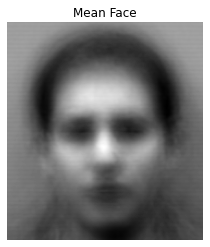

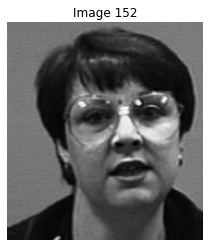

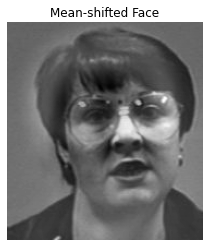

In [16]:
mean_face = FacialRec()

plt.title("Mean Face")
show(mean_face.mu)
plt.title("Image 152")
show(F[:,152])
plt.title("Mean-shifted Face")
show(mean_face.F_bar[:,152])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


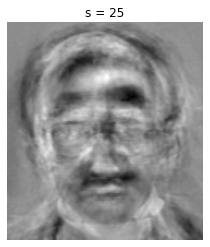

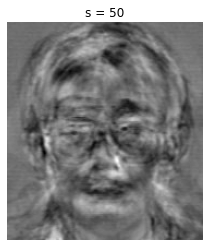

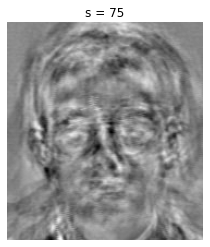

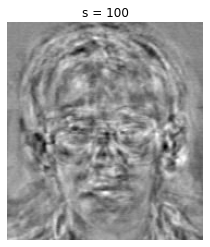

In [17]:
vars = [25, 50 , 75, 100]
for c in vars:
    plt.title("s = " + str(c))
    show(mean_face.U[:, c])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

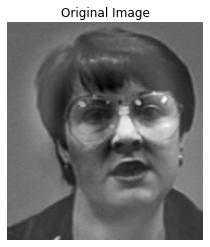

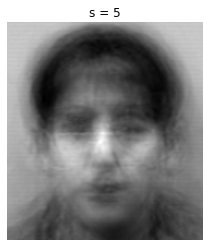

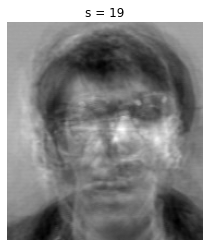

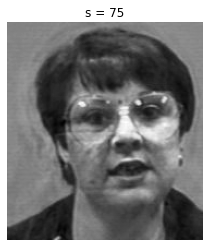

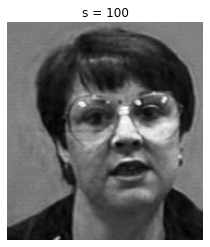

In [18]:

s_list = [5,19,75,100]
plt.title("Original Image")
show(mean_face.F_bar[:,152])
for s in s_list:
    f_hat = mean_face.project(mean_face.F_bar[:,152], s)
    shape = mean_face.mu.shape
    pizza = mean_face.U[:,0:s] @ f_hat
    pizza = np.reshape(pizza,shape)
    f_tilde = pizza + mean_face.mu
    plt.title("s = " + str(s))
    show(f_tilde)

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

104


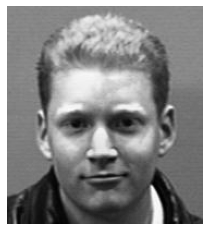

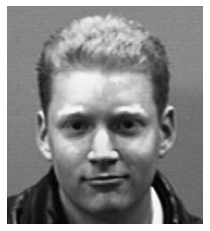

143


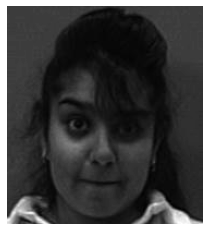

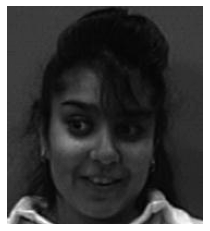

138


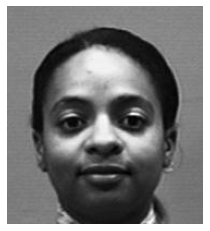

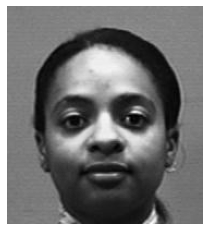

59


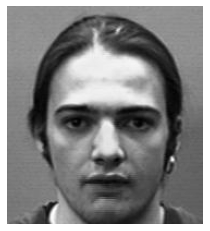

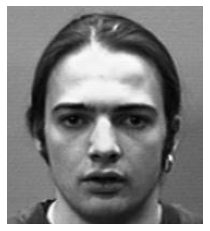

11


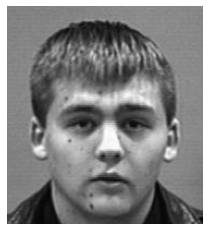

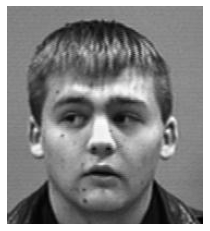

In [21]:
for test_image in sample_faces(5):
    mean_face.match(test_image)